# SpeedProfil

In [5]:
import os.path
import sys

#-------------------------------------------------------
# Import de tracklib

module_path = os.path.abspath(os.path.join('../../..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
from tracklib.core.GPSTime import GPSTime
import tracklib.algo.Interpolation as interpolation
from tracklib.io.GpxReader import GpxReader
import tracklib.algo.Analytics as stop
from tracklib.core.Plot import Plot

In [4]:
GPSTime.setReadFormat("4Y-2M-2DT2h:2m:2sZ")
tracks = GpxReader.readFromGpx('../data/vincennes.gpx', srid='ENU')
trace = tracks[0]
#trace.toENUCoords()
trace.summary()
trace.plot()

NameError: name 'GPSTime' is not defined

In [6]:
# Interpolation spatiale
trace.resample(5, interpolation.MODE_SPATIAL) # 5
trace.compute_abscurv()

[0,
 4.997587101269088,
 9.993562568929885,
 14.986443029932971,
 19.977684026445914,
 24.97085892549086,
 29.9636755980891,
 34.962925653369275,
 39.96281545984011,
 44.96116919998438,
 49.9606685255846,
 54.960548481863135,
 59.959932363698066,
 64.95982397998168,
 69.74408697720042,
 74.64853960847768,
 79.6470446161521,
 84.64659042040573,
 89.64600796370466,
 94.64587696010084,
 99.64583248112298,
 104.64529434198853,
 109.64194023157022,
 114.63721367349892,
 119.635344341859,
 124.63526765676926,
 129.63522388042318,
 134.6346807961091,
 139.63464477745745,
 144.63432734110307,
 149.6342378495189,
 154.6337781209732,
 159.63335238426635,
 164.63296186130742,
 169.63142536059885,
 174.63117207744153,
 179.63076594328456,
 184.6296285686619,
 189.62962856837595,
 194.62962389398962,
 199.62912658419563,
 204.62864740402185,
 209.62838658541384,
 214.62835908094132,
 219.6269381809277,
 224.62331910761722,
 229.62204551108695,
 234.62204507043467,
 239.6217915422633,
 244.620685267

---
---


/home/marie-dominique/tracklib/tracklib/core/Plot.py:324: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  ax1.legend(


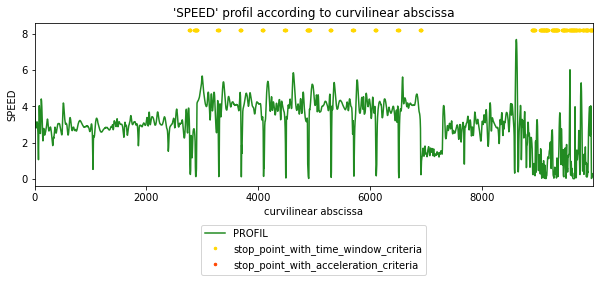

In [7]:
# -----------------------------------------------------------------------------
# Première méthode
trace.createAnalyticalFeature('stop_point_with_time_window_criteria', stop.VAL_AF_TIME_WINDOW_NONE)
trace.addAnalyticalFeature(stop.stop_point_with_time_window_criteria, 'stop_point_with_time_window_criteria')

# -----------------------------------------------------------------------------
# Autre méthode
trace.addAnalyticalFeature(stop.stop_point_with_acceleration_criteria)

# -----------------------------------------------------------------------------
# Méthode 

# -----------------------------------------------------------------------------
# # On dessine
TAB_AFS = ['stop_point_with_time_window_criteria', 'stop_point_with_acceleration_criteria']
plot = Plot(trace)
plot.plotProfil('SPATIAL_SPEED_PROFIL', TAB_AFS)